<a href="https://colab.research.google.com/github/roldugina/data_analysis_projects/blob/01_height_weight/FreeCodeCamp_lessons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import requests
import pandas as pd

In [ ]:
d=pd.read_csv('https://raw.githubusercontent.com/roldugina/data_analysis_projects/01_height_weight/HeightsWeights.csv')

In [ ]:
d.shape

(25001, 6)

In [ ]:
d.head

<bound method NDFrame.head of          Index  Height(Inches)  Weight(Pounds)  Height(m)  Weight(kg)  \
0          1.0        65.78331        112.9925   1.644583   51.243764   
1          2.0        71.51521        136.4873   1.787880   61.899002   
2          3.0        69.39874        153.0269   1.734968   69.399955   
3          4.0        68.21660        142.3354   1.705415   64.551202   
4          5.0        67.78781        144.2971   1.694695   65.440862   
...        ...             ...             ...        ...         ...   
24996  24997.0        64.54826        120.1932   1.613706   54.509388   
24997  24998.0        64.69855        118.2655   1.617464   53.635147   
24998  24999.0        67.52918        132.2682   1.688230   59.985578   
24999  25000.0        68.87761        124.8742   1.721940   56.632290   
25000      NaN             NaN             NaN        NaN         NaN   

             IMT  
0      18.946525  
1      19.364523  
2      23.055577  
3      22.194439 

In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25001 entries, 0 to 25000
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           25000 non-null  float64
 1   Height(Inches)  25000 non-null  float64
 2   Weight(Pounds)  25000 non-null  float64
 3   Height(m)       25000 non-null  float64
 4   Weight(kg)      25000 non-null  float64
 5   IMT             25000 non-null  float64
dtypes: float64(6)
memory usage: 1.1 MB


In [ ]:
d.describe()

,Index,Height(Inches),Weight(Pounds),Weight(kg),IMT
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421,57.632391,19.941331
std,7217.022701,1.901679,11.660898,5.288389,1.601683
min,1.000000,60.278360,78.014760,35.380844,13.490168
25%,6250.750000,66.704397,119.308675,54.108243,18.864692
50%,12500.500000,67.995700,127.157750,57.667914,19.921455
75%,18750.250000,69.272958,134.892850,61.175896,21.010776
max,25000.000000,75.152800,170.924000,77.516553,26.858548


In [ ]:
d['Weight(kg)'].describe()

count    25000.000000
mean        57.632391
std          5.288389
min         35.380844
25%         54.108243
50%         57.667914
75%         61.175896
max         77.516553
Name: Weight(kg), dtype: float64

# New Section

Text(0, 0.5, 'density')

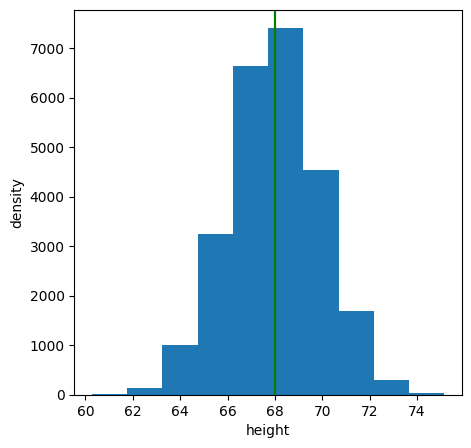

In [ ]:
p=d['Height(Inches)'].plot(kind='hist',figsize=(5,5))
p.axvline(d['Height(Inches)'].mean(), color="red")
p.axvline(d['Height(Inches)'].median(), color="green")
p.set_xlabel("height")
p.set_ylabel("density")

In [ ]:
d.corr()

<ipython-input-11-da7db8af9981>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  d.corr()


,Index,Height(Inches),Weight(Pounds),Weight(kg),IMT
Index,1.000000,0.009626,-0.007257,-0.007257,-0.014899
Height(Inches),0.009626,1.000000,0.502859,0.502859,-0.121519
Weight(Pounds),-0.007257,0.502859,1.000000,1.000000,0.795477
Weight(kg),-0.007257,0.502859,1.000000,1.000000,0.795477
IMT,-0.014899,-0.121519,0.795477,0.795477,1.000000


In [ ]:
d['Calculated_IMT']=d['Weight(kg)']/d['Height(m)']

TypeError: ignored

In [ ]:
d['Height(m)'].describe()

count    25000.000000
mean         1.699828
std          0.047542
min          1.506959
25%          1.667610
50%          1.699892
75%          1.731824
max          1.878820
Name: Height(m), dtype: float64

In [ ]:
d.describe()

,Index,Height(Inches),Weight(Pounds),Height(m),Weight(kg),IMT
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421,1.699828,57.632391,19.941331
std,7217.022701,1.901679,11.660898,0.047542,5.288389,1.601683
min,1.000000,60.278360,78.014760,1.506959,35.380844,13.490168
25%,6250.750000,66.704397,119.308675,1.667610,54.108243,18.864692
50%,12500.500000,67.995700,127.157750,1.699892,57.667914,19.921455
75%,18750.250000,69.272958,134.892850,1.731824,61.175896,21.010776
max,25000.000000,75.152800,170.924000,1.878820,77.516553,26.858548


In [ ]:
d['Calculated_IMT']=d['Weight(kg)']/d['Height(m)']/d['Height(m)']

In [ ]:
d['Calculated_IMT'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 25001 entries, 0 to 25000
Series name: Calculated_IMT
Non-Null Count  Dtype  
--------------  -----  
25000 non-null  float64
dtypes: float64(1)
memory usage: 195.4 KB


In [ ]:
(d['Calculated_IMT']!=d['IMT']).sum()

25001

In [ ]:
d['Index'].sum()

312512500.0

In [ ]:
d['Index'].head()

0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
Name: Index, dtype: float64

In [ ]:
d['IMT'].describe()

count    25000.000000
mean        19.941331
std          1.601683
min         13.490168
25%         18.864692
50%         19.921455
75%         21.010776
max         26.858548
Name: IMT, dtype: float64

In [ ]:
d['IMT'].median()

19.92145529

In [ ]:
d['IMT_check']=d['IMT']!=d['Calculated_IMT']

In [ ]:
d.head()

,Index,Height(Inches),Weight(Pounds),Height(m),Weight(kg),IMT,Calculated_IMT,IMT_check
0,1.0,65.78331,112.9925,1.644583,51.243764,18.946525,18.946525,True
1,2.0,71.51521,136.4873,1.787880,61.899002,19.364523,19.364523,True
2,3.0,69.39874,153.0269,1.734968,69.399955,23.055577,23.055577,True
3,4.0,68.21660,142.3354,1.705415,64.551202,22.194439,22.194439,True
4,5.0,67.78781,144.2971,1.694695,65.440862,22.785879,22.785879,True


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['Index'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_2, *['Height(Inches)'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_3, *['Weight(Pounds)'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_4, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_5, *['Index'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_6, *['Height(Inches)'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_7, *['Weight(Pounds)'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 10 * figscale, 10 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_8, *[[['index', 'Index'], ['Index', 'Height(Inches)'], ['Height(Inches)', 'Weight(Pounds)'], ['Weight(Pounds)', 'Height(m)']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_9, *['index', 'Height(Inches)', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_10, *['index', 'Weight(Pounds)', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_11, *['index', 'Height(m)', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_12, *['index', 'Weight(kg)', None], **{})
chart

<Axes: xlabel='Frequency'>

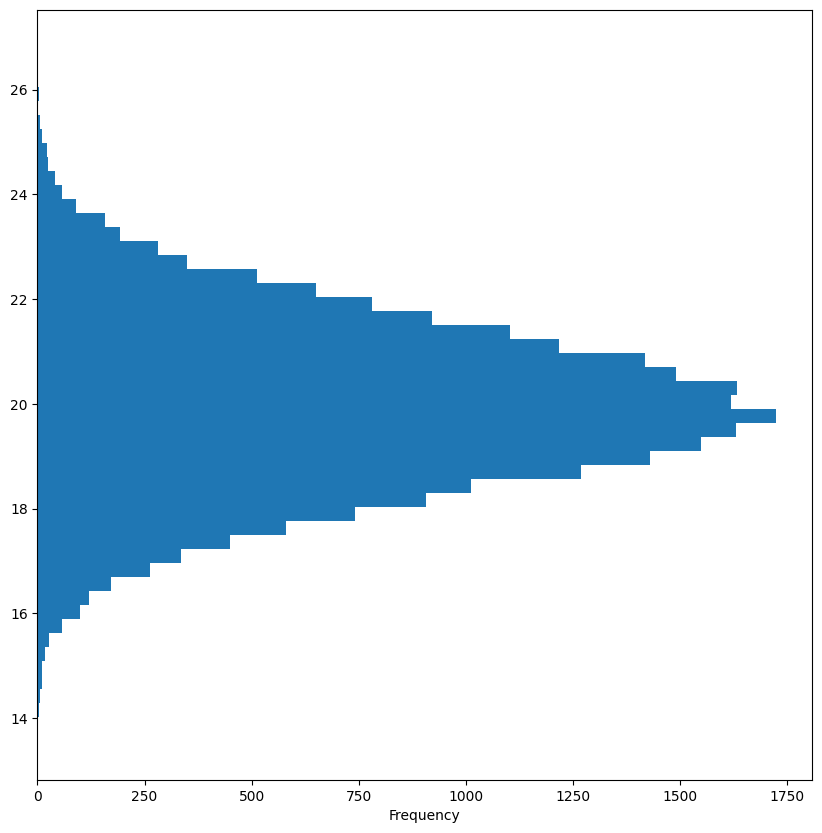

In [ ]:
d['IMT'].plot(kind='hist', bins=50, figsize=(10,10),orientation='horizontal')

In [ ]:
rand=np.random.randint(5,100,25000)

In [ ]:
rand.head()

AttributeError: ignored

In [1]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sales = pd.read_csv('https://raw.githubusercontent.com/ine-rmotr-curriculum/FreeCodeCamp-Pandas-Real-Life-Example/master/data/sales_data.csv',parse_dates=['Date'])

In [7]:
sales['Country'].value_counts().head(1)

United States    39206
Name: Country, dtype: int64

<Axes: >

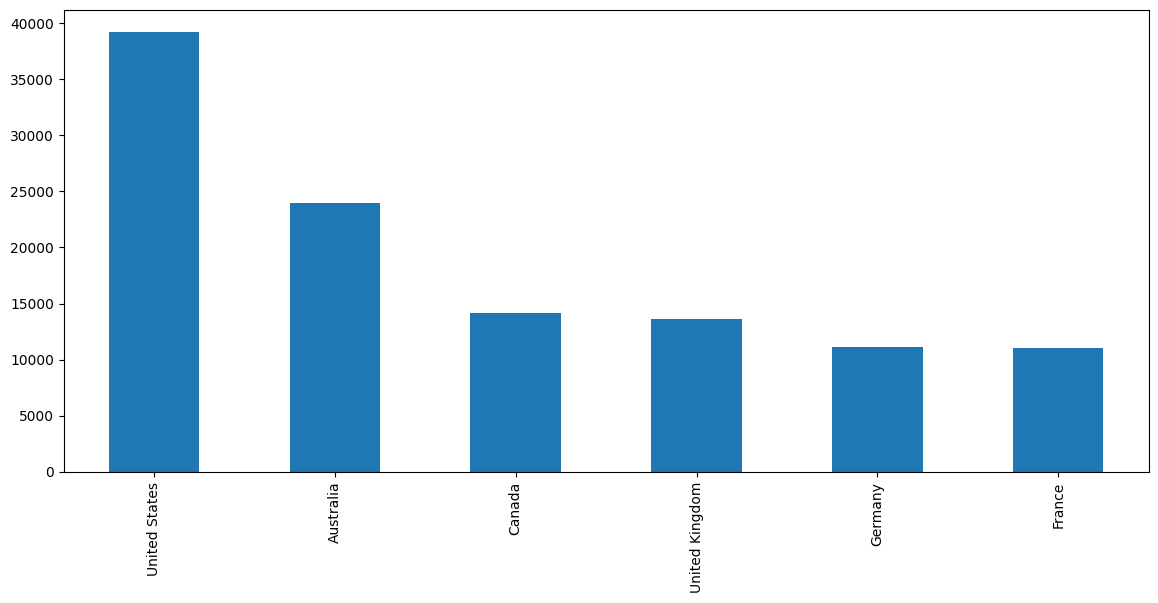

In [12]:
sales['Country'].value_counts().plot(kind='bar', figsize=(14,6))

In [13]:
sales['Product'].unique()

array(['Hitch Rack - 4-Bike', 'All-Purpose Bike Stand',
       'Mountain Bottle Cage', 'Water Bottle - 30 oz.',
       'Road Bottle Cage', 'AWC Logo Cap', 'Bike Wash - Dissolver',
       'Fender Set - Mountain', 'Half-Finger Gloves, L',
       'Half-Finger Gloves, M', 'Half-Finger Gloves, S',
       'Sport-100 Helmet, Black', 'Sport-100 Helmet, Red',
       'Sport-100 Helmet, Blue', 'Hydration Pack - 70 oz.',
       'Short-Sleeve Classic Jersey, XL',
       'Short-Sleeve Classic Jersey, L', 'Short-Sleeve Classic Jersey, M',
       'Short-Sleeve Classic Jersey, S', 'Long-Sleeve Logo Jersey, M',
       'Long-Sleeve Logo Jersey, XL', 'Long-Sleeve Logo Jersey, L',
       'Long-Sleeve Logo Jersey, S', 'Mountain-100 Silver, 38',
       'Mountain-100 Silver, 44', 'Mountain-100 Black, 48',
       'Mountain-100 Silver, 48', 'Mountain-100 Black, 38',
       'Mountain-200 Silver, 38', 'Mountain-100 Black, 44',
       'Mountain-100 Silver, 42', 'Mountain-200 Black, 46',
       'Mountain-200 Silver

In [14]:
sales['Product'].value_counts().head(10)

Water Bottle - 30 oz.      10794
Patch Kit/8 Patches        10416
Mountain Tire Tube          6816
AWC Logo Cap                4358
Sport-100 Helmet, Red       4220
Road Tire Tube              4176
Sport-100 Helmet, Black     4152
Fender Set - Mountain       4032
Sport-100 Helmet, Blue      3788
Touring Tire Tube           3702
Name: Product, dtype: int64

In [15]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [4]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [3]:
sales_short=sales.head(10)

In [6]:
sales.head(10)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
5,2016-05-15,15,May,2016,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,5,45,120,297,225,522
6,2014-05-22,22,May,2014,47,Adults (35-64),F,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,199,180,379
7,2016-05-22,22,May,2016,47,Adults (35-64),F,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,2,45,120,100,90,190
8,2014-02-22,22,February,2014,35,Adults (35-64),M,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,22,45,120,1096,990,2086
9,2016-02-22,22,February,2016,35,Adults (35-64),M,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,21,45,120,1046,945,1991


In [7]:
sales_short.head(10)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
5,2016-05-15,15,May,2016,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,5,45,120,297,225,522
6,2014-05-22,22,May,2014,47,Adults (35-64),F,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,199,180,379
7,2016-05-22,22,May,2016,47,Adults (35-64),F,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,2,45,120,100,90,190
8,2014-02-22,22,February,2014,35,Adults (35-64),M,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,22,45,120,1096,990,2086
9,2016-02-22,22,February,2016,35,Adults (35-64),M,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,21,45,120,1046,945,1991


In [8]:
sales_short['State'].value_counts()

New South Wales     4
Victoria            4
British Columbia    2
Name: State, dtype: int64

In [27]:
sales_short.groupby('State')['Order_Quantity'].sum()

State
British Columbia    16
New South Wales     52
Victoria            49
Name: Order_Quantity, dtype: int64

In [10]:
sales.corr()

<ipython-input-10-8c6bb5a772fe>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sales.corr()


,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Day,1.000000,-0.007635,-0.014296,-0.002412,0.003133,0.003207,0.004623,0.003329,0.003853
Year,-0.007635,1.000000,0.040994,0.123169,-0.217575,-0.213673,-0.181525,-0.215604,-0.208673
Customer_Age,-0.014296,0.040994,1.000000,0.026887,-0.021374,-0.020262,0.004319,-0.016013,-0.009326
Order_Quantity,-0.002412,0.123169,0.026887,1.000000,-0.515835,-0.515925,-0.238863,-0.340382,-0.312895
Unit_Cost,0.003133,-0.217575,-0.021374,-0.515835,1.000000,0.997894,0.741020,0.829869,0.817865
Unit_Price,0.003207,-0.213673,-0.020262,-0.515925,0.997894,1.000000,0.749870,0.826301,0.818522
Profit,0.004623,-0.181525,0.004319,-0.238863,0.741020,0.749870,1.000000,0.902233,0.956572
Cost,0.003329,-0.215604,-0.016013,-0.340382,0.829869,0.826301,0.902233,1.000000,0.988758
Revenue,0.003853,-0.208673,-0.009326,-0.312895,0.817865,0.818522,0.956572,0.988758,1.000000


<Axes: xlabel='Order_Quantity', ylabel='Profit'>

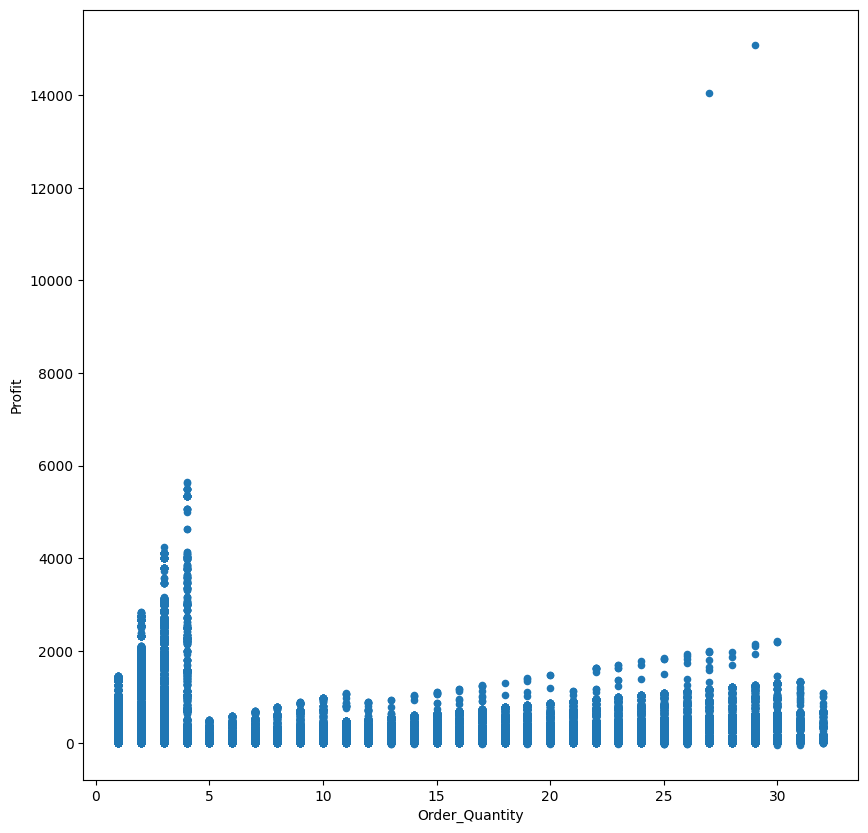

In [17]:
sales.plot(kind='scatter', x='Order_Quantity', y='Profit', figsize=(10,10))

<Axes: title={'center': 'Unit_Price'}, xlabel='[Country]'>

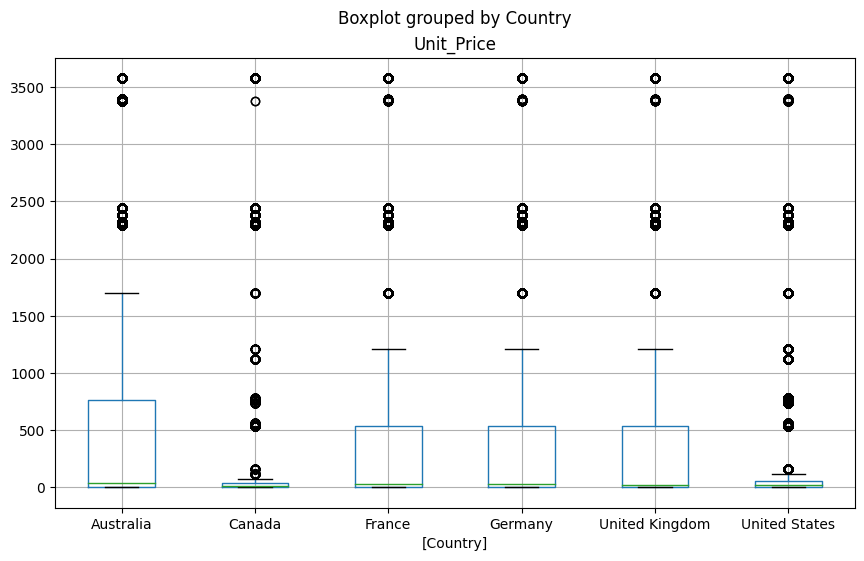

In [20]:


sales[['Unit_Price', 'Country']].boxplot(by='Country', figsize=(10,6))



<Axes: title={'center': 'Customer_Age'}, xlabel='[Country]'>

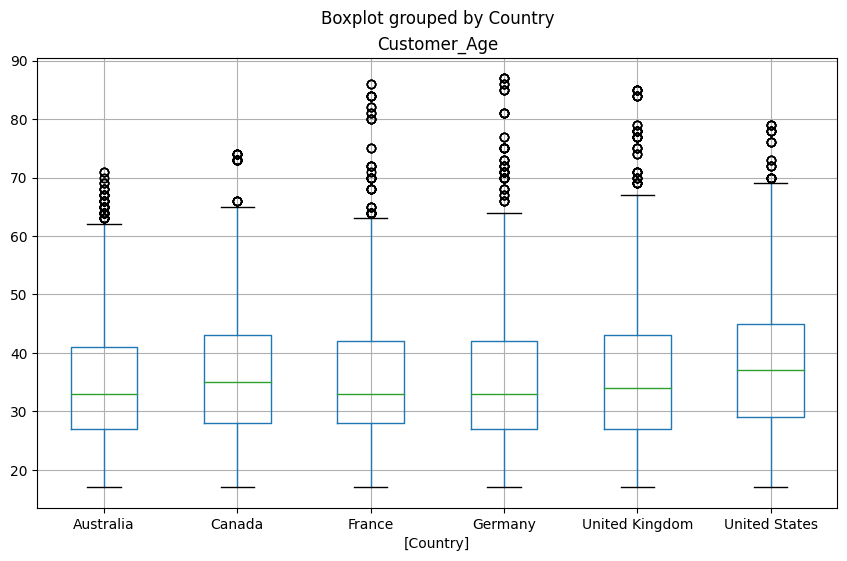

In [21]:


sales[['Customer_Age', 'Country']].boxplot(by='Country', figsize=(10,6))

In [10]:
sales['Calculated_Date'] = sales[['Year', 'Month', 'Day']].apply(lambda x: '{}-{}-{}'.format(x[0], x[1], x[2]), axis=1)
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Date
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,2013-November-26
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,2015-November-26
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,2014-March-23
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,2016-March-23
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418,2014-May-15


In [6]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Date
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,2013-November-26
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,2015-November-26
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,2014-March-23
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,2016-March-23
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418,2014-May-15


In [16]:
sales['Region'] = sales[['Country', 'State']].apply(lambda x: '{}, {}'.format(x[0], x[1]), axis=1)
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Date,Region
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,2013-November-26,"Canada, British Columbia"
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,2015-November-26,"Canada, British Columbia"
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,2014-March-23,"Australia, New South Wales"
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,2016-March-23,"Australia, New South Wales"
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418,2014-May-15,"Australia, New South Wales"


In [24]:
sales['Calculated_Date'] = pd.to_datetime(sales['Calculated_Date'])
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Date,Region
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,2013-11-26,"Canada, British Columbia"
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,2015-11-26,"Canada, British Columbia"
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,2014-03-23,"Australia, New South Wales"
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,2016-03-23,"Australia, New South Wales"
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418,2014-05-15,"Australia, New South Wales"


In [27]:
sales_by_years=sales['Year'].value_counts().sort_index()
sales_by_years.head()

2011     2677
2012     2677
2013    24443
2014    29398
2015    24443
Name: Year, dtype: int64

<Axes: >

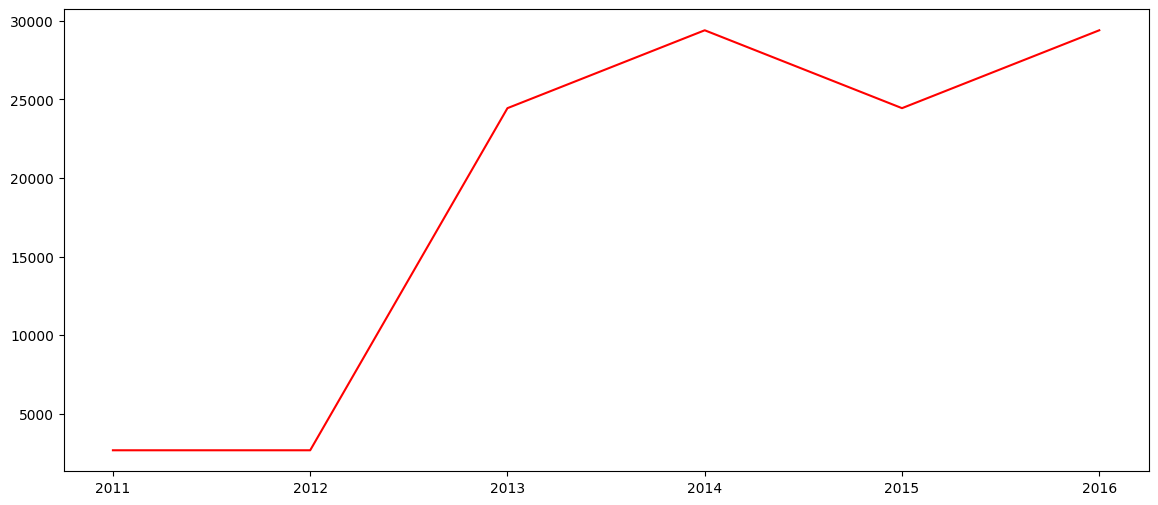

In [28]:
sales_by_years.plot(color='red', figsize=(14,6))

<Axes: >

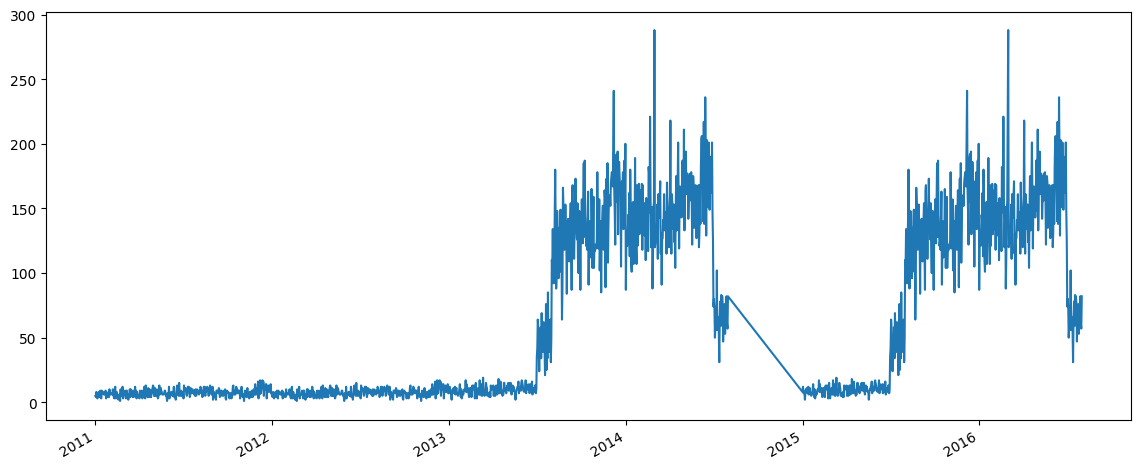

In [29]:
sales['Calculated_Date'].value_counts().plot(kind='line', figsize=(14,6))

In [30]:
sales['Revenue']+=50

In [31]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Date,Region
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,1000,2013-11-26,"Canada, British Columbia"
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,1000,2015-11-26,"Canada, British Columbia"
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2451,2014-03-23,"Australia, New South Wales"
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2138,2016-03-23,"Australia, New South Wales"
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,468,2014-05-15,"Australia, New South Wales"


In [42]:
sales.loc[(sales['Country']=='Canada')|(sales['Country']=='France')].value_counts()

Date        Day  Month      Year  Customer_Age  Age_Group             Customer_Gender  Country  State             Product_Category  Sub_Category       Product                  Order_Quantity  Unit_Cost  Unit_Price  Profit  Cost  Revenue  Calculated_Date  Region                  
2016-03-29  29   March      2016  33            Young Adults (25-34)  F                Canada   British Columbia  Accessories       Tires and Tubes    Mountain Tire Tube       24              2          5           71      48    169      2016-03-29       Canada, British Columbia    3
2013-09-15  15   September  2013  27            Young Adults (25-34)  F                Canada   British Columbia  Accessories       Tires and Tubes    Patch Kit/8 Patches      16              1          2           16      16    82       2013-09-15       Canada, British Columbia    3
2013-11-22  22   November   2013  31            Young Adults (25-34)  F                Canada   British Columbia  Accessories       Bottles and Cages 

In [43]:
sales.loc[(sales['Sub_Category']=='Bike racks')|(sales['Country']=='Canada')].shape[0]

14178

In [45]:
sales_france=sales.loc[sales['Country']=='France']

In [47]:
sales_france['State'].value_counts()

Seine (Paris)        2328
Seine Saint Denis    1684
Nord                 1670
Hauts de Seine       1084
Essonne               994
Yveline               954
Seine et Marne        394
Moselle               386
Loiret                382
Val d'Oise            264
Garonne (Haute)       208
Val de Marne          158
Charente-Maritime     148
Somme                 134
Loir et Cher          120
Pas de Calais          90
Name: State, dtype: int64

<Axes: >

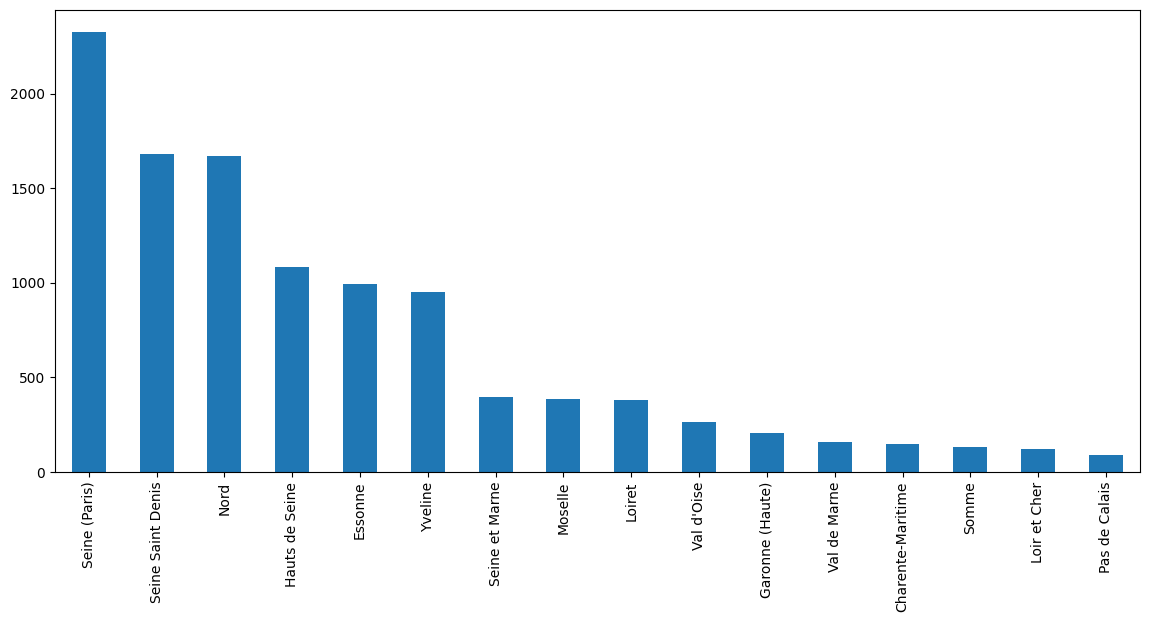

In [50]:
sales_france['State'].value_counts().plot(kind='bar',figsize=(14,6))

<Axes: ylabel='Product_Category'>

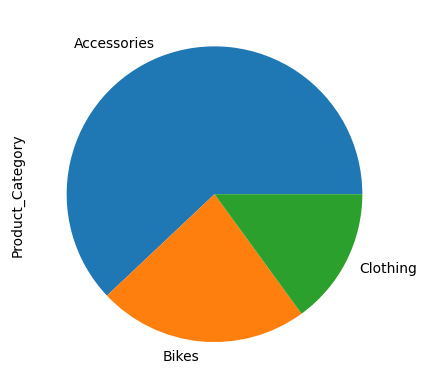

In [52]:


sales['Product_Category'].value_counts().plot(kind='pie')

In [13]:
sales['Product_Category'].value_counts()

Accessories    70120
Bikes          25982
Clothing       16934
Name: Product_Category, dtype: int64

<Axes: >

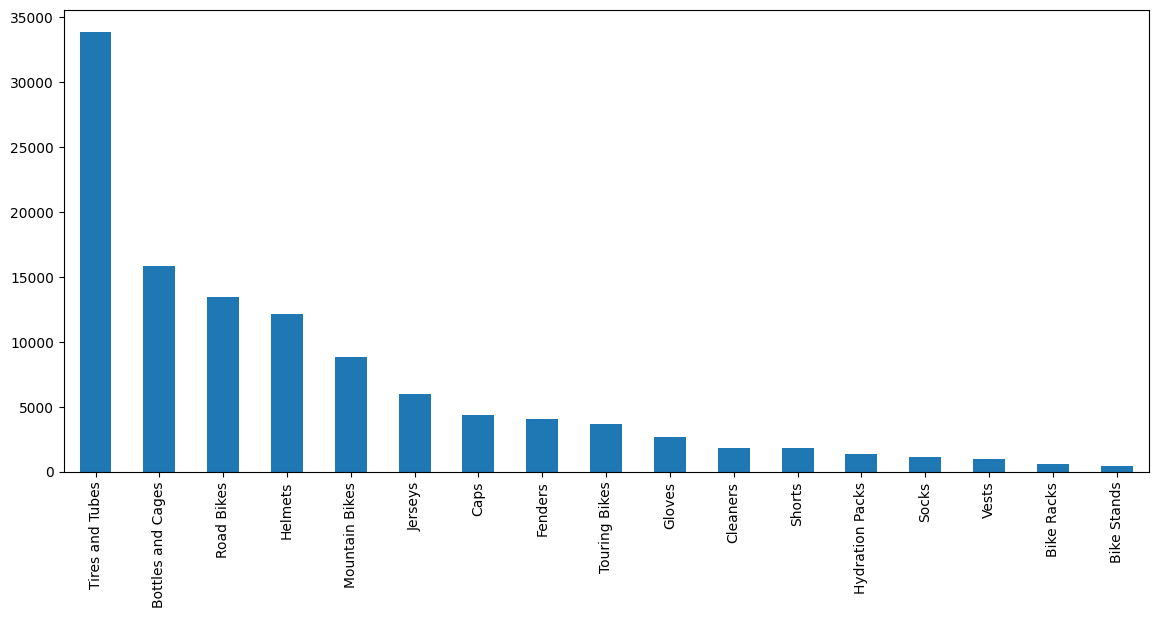

In [3]:
sales['Sub_Category'].value_counts().plot(kind='bar',figsize=(14,6))

In [11]:
accessories=sales.loc[sales['Product_Category']=='Accessories']

In [12]:
accessories['Sub_Category'].value_counts()

Tires and Tubes      33870
Bottles and Cages    15876
Helmets              12158
Fenders               4032
Cleaners              1802
Hydration Packs       1334
Bike Racks             592
Bike Stands            456
Name: Sub_Category, dtype: int64

In [16]:
accessories1 = sales.loc[sales['Product_Category'] == 'Accessories', 'Sub_Category']

In [18]:
accessories1.shape

(70120,)

In [21]:
Bikes = sales.loc[sales['Product_Category'] == 'Bikes', 'Sub_Category']
Bikes.value_counts()

Road Bikes        13430
Mountain Bikes     8854
Touring Bikes      3698
Name: Sub_Category, dtype: int64

In [28]:
gender=sales['Customer_Gender'].value_counts()
gender.index[0]

'M'

In [10]:
sales_men = sales.loc[(sales['Customer_Gender'] == 'M') & (sales['Revenue']>500)]
sales_men.shape[0]

21773

In [12]:
sales.sort_values(['Revenue'], ascending=False).head(5)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
112073,2015-07-24,24,July,2015,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",29,1482,2384,15096,42978,58074
112072,2013-07-24,24,July,2013,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",27,1482,2384,14055,40014,54069
71129,2011-07-08,8,July,2011,22,Youth (<25),M,Canada,Alberta,Bikes,Road Bikes,"Road-150 Red, 48",4,2171,3578,5628,8684,14312
70307,2011-04-30,30,April,2011,44,Adults (35-64),M,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",4,2171,3578,5485,8684,14169
70601,2011-09-30,30,September,2011,19,Youth (<25),F,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",4,2171,3578,5485,8684,14169


In [14]:
sales_bike=sales.loc[sales['Product']=='Road-150 Red, 48']

In [15]:
sales_bike.shape

(644, 18)

In [16]:
sales_bike.values_count()

AttributeError: ignored

In [17]:
sales_bike.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
58158,2012-02-26,26,February,2012,53,Adults (35-64),M,United States,Washington,Bikes,Road Bikes,"Road-150 Red, 48",2,2171,3578,1240,4342,5582
58159,2011-02-26,26,February,2011,53,Adults (35-64),M,United States,Washington,Bikes,Road Bikes,"Road-150 Red, 48",1,2171,3578,620,2171,2791
58160,2012-05-25,25,May,2012,53,Adults (35-64),M,United States,Washington,Bikes,Road Bikes,"Road-150 Red, 48",2,2171,3578,1240,4342,5582
58161,2011-05-25,25,May,2011,53,Adults (35-64),M,United States,Washington,Bikes,Road Bikes,"Road-150 Red, 48",4,2171,3578,2479,8684,11163
58162,2012-08-15,15,August,2012,53,Adults (35-64),M,United States,Washington,Bikes,Road Bikes,"Road-150 Red, 48",2,2171,3578,1240,4342,5582


In [18]:
cond = sales['Revenue'] == sales['Revenue'].max()

In [19]:
cond

0         False
1         False
2         False
3         False
4         False
          ...  
113031    False
113032    False
113033    False
113034    False
113035    False
Name: Revenue, Length: 113036, dtype: bool

In [20]:
sales.loc[cond]

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
112073,2015-07-24,24,July,2015,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",29,1482,2384,15096,42978,58074


In [21]:
sales['Revenue'].max()

58074

In [8]:
orders=sales.loc[sales['Revenue']>10000,'Order_Quantity']
orders.describe

<bound method NDFrame.describe of 49327      4
57273      4
57297      4
57299      4
57311      4
          ..
71497      3
71531      3
71555      3
112072    27
112073    29
Name: Order_Quantity, Length: 169, dtype: int64>

In [23]:
orders.head()

49327    4
57273    4
57297    4
57299    4
57311    4
Name: Order_Quantity, dtype: int64

In [9]:
orders.mean()

3.7218934911242605

In [4]:
cond=sales['Revenue']>10000
sales.loc[cond,'Order_Quantity'].mean()

3.7218934911242605

In [13]:
cond=(sales['Month']=='May')&(sales['Year']==2016)
sales.loc[cond].shape[0]

5015

In [15]:
cond=(sales['Month'].isin(['May','June','July']))&(sales['Year']==2016)
sales.loc[cond].shape[0]

12164

Revenue    Axes(0.125,0.11;0.775x0.77)
dtype: object

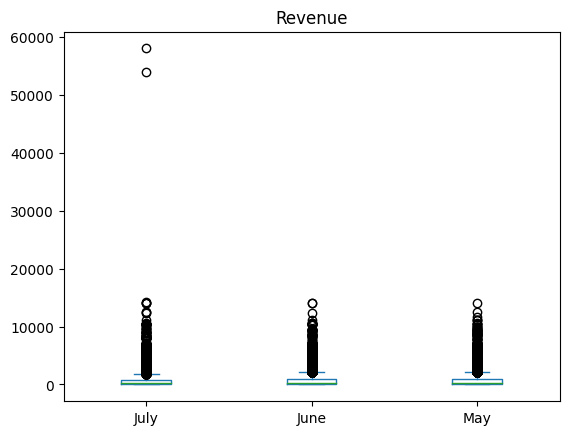

In [23]:
sales.loc[cond].plot(kind='box',column='Revenue',by='Month')

Profit    Axes(0.125,0.11;0.775x0.77)
dtype: object

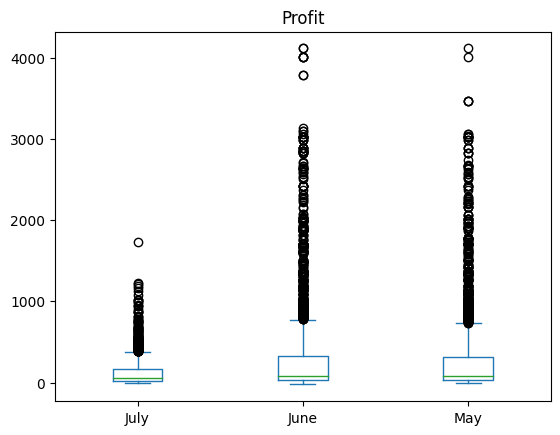

In [26]:
cond=(sales['Month'].isin(['May','June','July']))&(sales['Year']==2016)
profit_2016=sales.loc[cond,['Month','Profit']]
profit_2016.plot(kind='box',by='Month')

In [18]:
cond.shape

(113036,)

In [20]:
cond=sales['Month'].isin(['May','June','July'])
cond.head()

0    False
1    False
2    False
3    False
4     True
Name: Month, dtype: bool

In [30]:
sales.loc[sales['Country']=='United States','Unit_Price']*=1.072